# --------------------------------------- Workshop #4 -------------------------------------


* This workshop includes marked tasks that comprise 15% of your final mark in this module. 

* You need to read the examples in Lecture #4 and Lecture #4 exercise to complete the tasks. 

# Tasks

## TASK 4.1:  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods (10%).

## NOTE: You should comment on your code wherever necessary and briefly explain what the code is doing

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
#Importing necessary Libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [2]:
#importing the dataset as a Pandas DataFrame into Python with the data path from local disk 
adult_WS4_data = pd.read_csv('adult_WS4.csv')
adult_WS4_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [3]:
# data size
adult_WS4_data.shape

(10000, 15)

In [4]:
# summary stats
adult_WS4_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [5]:
# Generate descriptive statistics.
adult_WS4_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000
mean,38.603400,1.895382e+05,10.071000,1029.02620,90.598900,40.453900
std,13.725842,1.054084e+05,2.564803,6999.48071,411.768551,12.328571
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.367728e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.00000,3770.000000,99.000000


In [6]:
# more summary
desc = pd.DataFrame(index = list(adult_WS4_data))
desc['type'] = adult_WS4_data.dtypes
desc['count'] = adult_WS4_data.count()
desc['nunique'] = adult_WS4_data.nunique()
desc['%unique'] = desc['nunique'] / len(adult_WS4_data) * 100
desc['null'] = adult_WS4_data.isnull().sum()
desc['%null'] = desc['null'] / len(adult_WS4_data) * 100
desc['total'] = len(adult_WS4_data)
desc

,type,count,nunique,%unique,null,%null,total
age,int64,10000,71,0.71,0,0.00,10000
workclass,object,9825,9,0.09,175,1.75,10000
fnlwgt,int64,10000,8514,85.14,0,0.00,10000
education,object,10000,16,0.16,0,0.00,10000
education-num,int64,10000,16,0.16,0,0.00,10000
marital-status,object,10000,7,0.07,0,0.00,10000
occupation,object,9825,15,0.15,175,1.75,10000
relationship,object,10000,6,0.06,0,0.00,10000
race,object,10000,5,0.05,0,0.00,10000
sex,object,10000,2,0.02,0,0.00,10000


In [7]:
# checking null columns
adult_WS4_data.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [8]:
# for column with null values, we will fill them up with their mode
null_cols = ['workclass', 'occupation', 'native-country']
adult_WS4_data[null_cols] = adult_WS4_data[null_cols].apply(lambda x: x.fillna(x.mode()[0]))
adult_WS4_data.isna().sum().any()

False

In [9]:
# choosing the three optional columns in the dataset to apply K-Means and Hierarchical clustering to
optional_cols = ['education', 'sex', 'marital-status']

In [10]:
# Encoding the categorical variables

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the choosen columns
adult_WS4_data['education'] = le.fit_transform(adult_WS4_data['education'])
adult_WS4_data['sex'] = le.fit_transform(adult_WS4_data['sex'])
adult_WS4_data['marital-status'] = le.fit_transform(adult_WS4_data['marital-status'])

# Scaling the data
scaler = StandardScaler()
adult_WS4_data_scaled = scaler.fit_transform(adult_WS4_data[optional_cols])

# Convert the scaled data back to a pandas DataFrame
adult_WS4_data_scaled = pd.DataFrame(adult_WS4_data_scaled, columns=optional_cols)
adult_WS4_data_scaled.head()

,education,sex,marital-status
0,0.441301,-1.414638,-0.419009
1,1.221673,0.706895,-0.419009
2,-0.339072,-1.414638,-0.419009
3,-0.599196,0.706895,-0.419009
4,0.181176,0.706895,-0.419009




Optimal number of clusters (KMeans Clustering - Elbow method): 18 




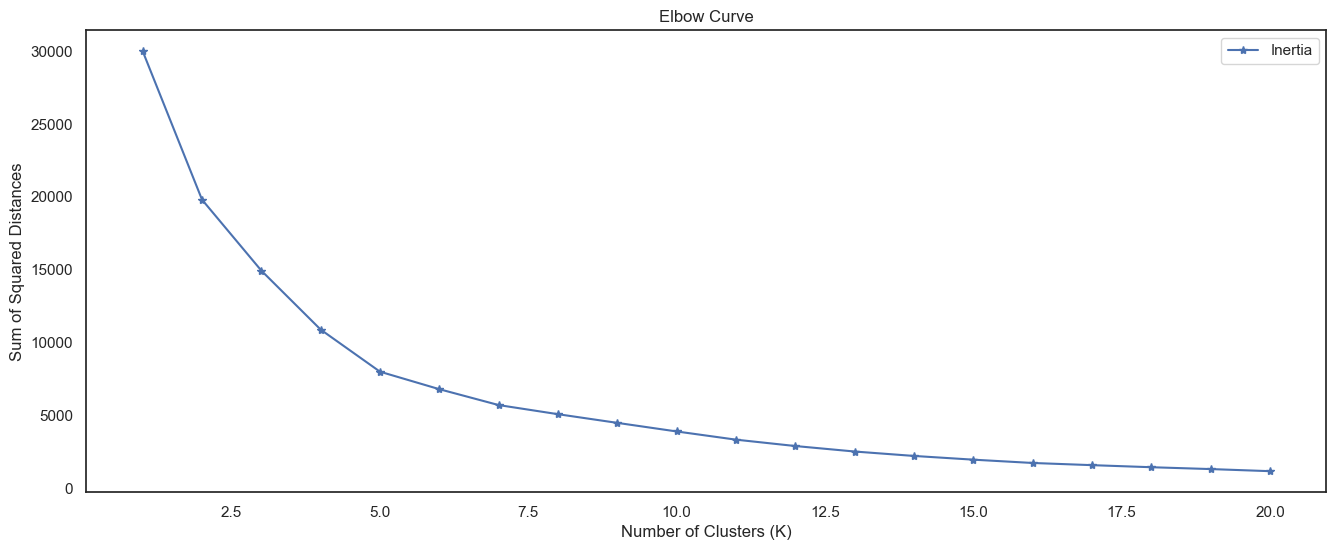

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

min_clusters = 1
max_clusters = 20
inertias = [] # Initialize list for storing results

# Iterate through cluster numbers
for k in range(min_clusters, max_clusters + 1):
    rng = np.random.RandomState(42)
    kmeans = KMeans(n_clusters=k, random_state=rng, n_init=100).fit(adult_WS4_data_scaled)
    #kmeans = KMeans(n_clusters=k)
    #kmeans.fit(adult_WS4_data_scaled)
    #wcss.append(kmeans.inertia_)
    inertias.append(kmeans.inertia_)
    


rate_of_change = np.diff(inertias)
rate_of_change_ratio = rate_of_change[1:] / rate_of_change[:-1]
optimal_k_elbow = np.argmax(rate_of_change_ratio) + min_clusters
print(f"\n\nOptimal number of clusters (KMeans Clustering - Elbow method): {optimal_k_elbow} \n\n")

# Elbow curve plotting
fig, ax1 = plt.subplots(1, 1, figsize=(16, 6))
ax1.plot(range(min_clusters, max_clusters + 1), inertias, marker='*', label='Inertia')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Sum of Squared Distances')
ax1.set_title('Elbow Curve')
ax1.legend()
plt.show()



The output "Optimal number of clusters (KMeans Clustering - Elbow method): 18" indicates that, according to the Elbow method applied to KMeans clustering, the optimal number of clusters for the given dataset appears to be 18, this suggests that after 18 clusters, the rate of decrease in within-cluster sum of squares (WCSS) slows down noticeably, indicating that 18 clusters might be the appropriate number for partitioning the dataset. 

The code 'np.random.RandomState(42)' creates a random number generator with a fixed seed of 42, ensuring that the same random numbers are generated every time the code is run

In [12]:
# Fit KMeans to the data
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=10)
y_means = kmeans.fit_predict(adult_WS4_data_scaled)

# Add the cluster labels to the original dataframe
y_means1 = y_means + 1
adult_WS4_data_scaled['cluster'] = y_means1

# View the first 10 rows of the clustered data
adult_WS4_data_scaled.head(10)

C:\Users\opeol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,education,sex,marital-status,cluster
0,0.441301,-1.414638,-0.419009,4
1,1.221673,0.706895,-0.419009,3
2,-0.339072,-1.414638,-0.419009,4
3,-0.599196,0.706895,-0.419009,1
4,0.181176,0.706895,-0.419009,1
5,0.181176,0.706895,0.909070,5
6,0.181176,-1.414638,1.573109,7
7,0.181176,-1.414638,-0.419009,4
8,0.181176,-1.414638,-1.747088,4
9,1.221673,0.706895,-0.419009,3


In [13]:
# Calculate the mean of each column for each cluster
mean_adult_WS4_data_scaled = adult_WS4_data_scaled.groupby('cluster').mean()
print(mean_adult_WS4_data_scaled)

         education       sex  marital-status
cluster                                     
1        -0.069037  0.706895       -0.569776
2         1.208129 -1.414638        0.828734
3         1.187934  0.706895       -0.568253
4         0.168724 -1.414638       -1.296153
5         0.338771  0.706895        0.994599
6        -2.102172  0.706895        0.086479
7        -0.109601 -1.414638        1.177512
8        -2.293560 -1.414638        0.440811


The KMeans Clustering algorithm assigns cluster labels to each data point and the mean values of the varaiables are calculated.We can understand and interprete the results of the clustering algorithm by looking at the mean values of each variable and identify existing patterns and relationships.

The mean value of 'education' for cluster 1 is -0.069037, the mean value of the sex column for cluster 1 is 0.706895, and the mean value of the marital-status column for cluster 1 is -0.569776.

We can also see that clusters 2 and 3 have positive mean values for education, indicating higher levels of education. Clusters 2 and 8 have negative mean values for sex this indicates a higher proportion of female individuals. Cluster 4 has a negative mean value for marital-status, indicating that this cluster has a higher proportion of unmarried individuals.

In [14]:
# Finding the optimum number of clusters using Hierarchical clustering

adult_WS4_data_scaled.head()

,education,sex,marital-status,cluster
0,0.441301,-1.414638,-0.419009,4
1,1.221673,0.706895,-0.419009,3
2,-0.339072,-1.414638,-0.419009,4
3,-0.599196,0.706895,-0.419009,1
4,0.181176,0.706895,-0.419009,1


In [15]:
adult_WS4_data_scaled.drop('cluster', axis=1, inplace=True)

In [16]:
adult_WS4_data_scaled.head()

,education,sex,marital-status
0,0.441301,-1.414638,-0.419009
1,1.221673,0.706895,-0.419009
2,-0.339072,-1.414638,-0.419009
3,-0.599196,0.706895,-0.419009
4,0.181176,0.706895,-0.419009


In [17]:
#initialize the StandardScaler
scaler = StandardScaler()

#fit and transform the data
adult_WS4_data_scaled2 = scaler.fit_transform(adult_WS4_data_scaled)

# Convert the scaled data back to a pandas DataFrame
adult_WS4_data_scaled2 = pd.DataFrame(adult_WS4_data_scaled, columns=adult_WS4_data_scaled.columns)


In [18]:
adult_WS4_data_scaled2.head()

,education,sex,marital-status
0,0.441301,-1.414638,-0.419009
1,1.221673,0.706895,-0.419009
2,-0.339072,-1.414638,-0.419009
3,-0.599196,0.706895,-0.419009
4,0.181176,0.706895,-0.419009


In [19]:
#create an instance of AgglomerativeClustering
adult_WS4_Aggl_Cluster = AgglomerativeClustering(n_clusters=8, linkage='ward')

# Fit AgglomerativeClustering to the data and predict cluster labels
adult_WS4_Aggl_Cluster_ids = adult_WS4_Aggl_Cluster.fit_predict(adult_WS4_data_scaled2)

# Add the cluster labels to the original dataframe
adult_WS4_data_scaled2.loc[:, 'cluster'] = adult_WS4_Aggl_Cluster_ids

In [20]:
adult_WS4_data_scaled2.head()

,education,sex,marital-status,cluster
0,0.441301,-1.414638,-0.419009,3
1,1.221673,0.706895,-0.419009,6
2,-0.339072,-1.414638,-0.419009,3
3,-0.599196,0.706895,-0.419009,4
4,0.181176,0.706895,-0.419009,4


In [21]:
# Calculate the mean of each column for each cluster
hierarchical_cluster = pd.DataFrame(round(adult_WS4_data_scaled2. groupby('cluster').mean(),1))

hierarchical_cluster

,education,sex,marital-status
cluster,,,
0,0.3,0.7,1.0
1,0.3,-1.4,1.1
2,-2.2,0.7,0.0
3,0.1,-1.4,-1.2
4,-0.1,0.7,-0.4
5,-2.2,-1.4,1.0
6,1.2,0.7,-0.4
7,0.2,0.7,-1.7


The Agglomerative Clustering algorithm assigns cluster labels to each data point and the mean values of the varaiables are calculated.We can understand and interprete the results of the clustering algorithm by looking at the mean values of each variable and identify existing patterns and relationships.

The mean value of 'education' for cluster 0 is 0.3, the mean value of the sex column for cluster 0 is 0.7, and the mean value of the marital-status column for cluster 0 is 1.0.

We can also see that clusters 0 and 6 have positive mean values for education, indicating higher levels of education. Clusters 1 and 5 have negative mean values for sex this indicates a higher proportion of female individuals. Cluster 3 has a negative mean value for marital-status, indicating that this cluster has a higher proportion of unmarried individuals.

## Task 4.2: Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column (5%). 

## NOTE 1: You should comment on your code wherever necessary and briefly explain what the code is doing.

## NOTE 2: You need to encode the categorical columns, normalise the dataset, and remove the income column before applying the PCA method. 

## HINT: See the examples in the last three slides in Lecture #4 or the Lecture #4 exercise notebook

In [22]:
#importing the dataset as a Pandas DataFrame into Python with the data path from local disk 
#adult_WS4_data = pd.read_csv('adult_WS4.csv')

In [23]:
adult_WS4_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education          int32
education-num      int64
marital-status     int32
occupation        object
relationship      object
race              object
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [24]:
# Encoding the income column
le = LabelEncoder()
adult_WS4_data['income_encoded'] = le.fit_transform(adult_WS4_data['income'])

# Encoding the income column
#le = LabelEncoder()
#adult_WS4_data['income_encoded'] = le.fit_transform(adult_WS4_data['income'])

In [25]:
# Remove income column
adult_WS4_data.drop('income', axis=1, inplace=True)

In [26]:
adult_WS4_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education          int32
education-num      int64
marital-status     int32
occupation        object
relationship      object
race              object
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income_encoded     int32
dtype: object

In [27]:
# Encoding the categorical columns

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
adult_WS4_data_categorical = pd.get_dummies(adult_WS4_data[categorical_columns])

#initiate standardscaler
scaler_categorical = StandardScaler()

# Normalize categorical columns
adult_WS4_data_categorical_normalized = scaler_categorical.fit_transform(adult_WS4_data_categorical)

In [28]:
# Encoding the Numeric columns
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
adult_WS4_data_numeric = adult_WS4_data[numeric_columns]

#initiate standardscaler
scaler_numeric = StandardScaler()

# normalize numeric columns
adult_WS4_data_numeric_normalized = scaler_numeric.fit_transform(adult_WS4_data_numeric)

In [29]:
# concatenate the normalized categorical and numeric columns
adult_WS4_data_normalized = np.concatenate((adult_WS4_data_categorical_normalized, adult_WS4_data_numeric_normalized), axis=1)


In [30]:
adult_WS4_data_normalized = pd.DataFrame(adult_WS4_data_normalized)
print(adult_WS4_data_normalized.head())

         0         1         2         3         4         5         6   \
0  0.441301 -0.419009 -1.414638 -0.205978 -0.167845 -0.260833 -0.010001   
1  1.221673 -0.419009  0.706895 -0.205978 -0.167845 -0.260833 -0.010001   
2 -0.339072 -0.419009 -1.414638  4.854897 -0.167845 -0.260833 -0.010001   
3 -0.599196 -0.419009  0.706895 -0.205978 -0.167845 -0.260833 -0.010001   
4  0.181176 -0.419009  0.706895 -0.205978 -0.167845 -0.260833 -0.010001   

         7         8         9         10        11        12        13  \
0  0.633518 -0.185599 -0.295284 -0.205185 -0.024502 -0.206241 -0.357993   
1  0.633518 -0.185599 -0.295284 -0.205185 -0.024502 -0.206241 -0.357993   
2 -1.578487 -0.185599 -0.295284 -0.205185 -0.024502  4.848691 -0.357993   
3  0.633518 -0.185599 -0.295284 -0.205185 -0.024502 -0.206241 -0.357993   
4  0.633518 -0.185599 -0.295284 -0.205185 -0.024502 -0.206241 -0.357993   

         14        15        16        17        18        19        20  \
0 -0.020004 -0.373980  

In [31]:
# Applying PCA to the dataset for dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(adult_WS4_data_normalized)

In [32]:
# Variance ratio of principal component
explained_variance = pca.explained_variance_ratio_

# create a Dataframe with the Principal Components and explained variance ratio
principal_adult_WS4_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(2)])
explained_variance_df = pd.DataFrame(data=explained_variance, columns=['Explained Variance'])
print(principal_adult_WS4_df.tail())



           PC1       PC2
9995  1.789982 -1.853490
9996 -0.086505 -1.132675
9997 -0.454366 -0.367373
9998  0.137505 -0.521993
9999  3.285613  0.095648


In [33]:
# concatenate the principal components Dataframe with the income_encoded column
final_adult_WS4_df = pd.concat([principal_adult_WS4_df, adult_WS4_data['income_encoded']], axis=1)

final_adult_WS4_df.head()

,PC1,PC2,income_encoded
0,0.185369,-0.987985,1
1,-1.533162,-0.172757,0
2,1.501302,-0.869830,0
3,-1.126975,-0.201726,1
4,-1.402880,-0.234748,0


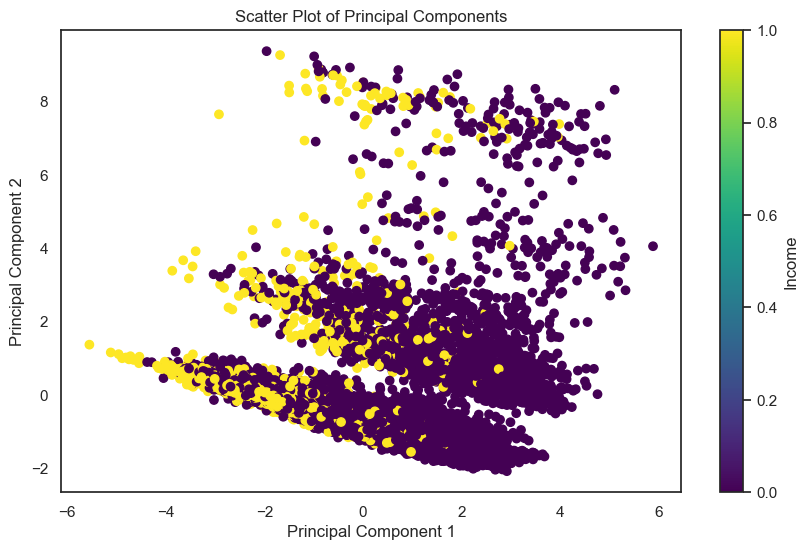

In [34]:
# Plot the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(final_adult_WS4_df['PC1'], final_adult_WS4_df['PC2'], c=final_adult_WS4_df['income_encoded'], cmap='viridis')
plt.title('Scatter Plot of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Income')
plt.show()

word count: 372